# Lojistik Regresyon İle Kalp Krizi Analizi

##### caa: ana damar sayısı
##### cp: göğüs ağrısı tipi
##### trtbps: kan basıncı
##### fbs: açlık kan şekeri > 120 mg/dl (1 = doğru; 0 = yanlış)
##### restecg: istirahat elektrokardiyografi sonuçları
##### thalachh: maksimum kalp atış hızı
##### exng: egzersize bağlı göğüs ağrısı 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("datasets/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [10]:
data["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [15]:
kategorik = ["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

In [16]:
data_kat = data.loc[:,kategorik]

In [20]:
data_kat.head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


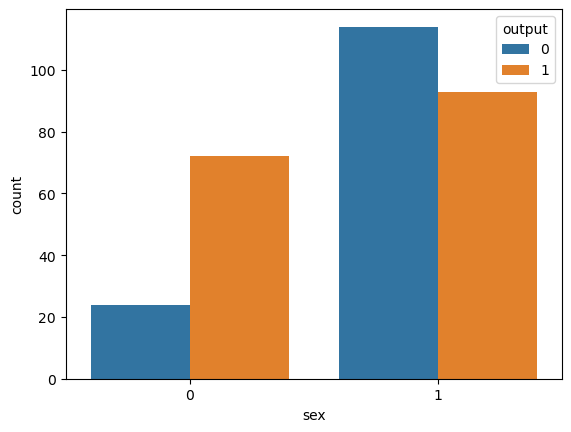

In [30]:
sns.countplot(x = "sex",data= data_kat, hue= "output")
plt.show()

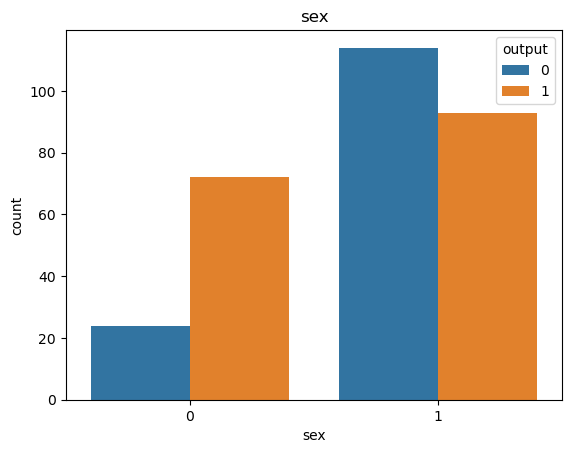

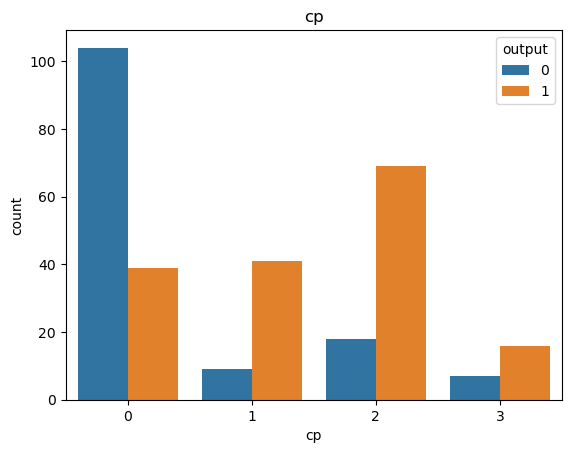

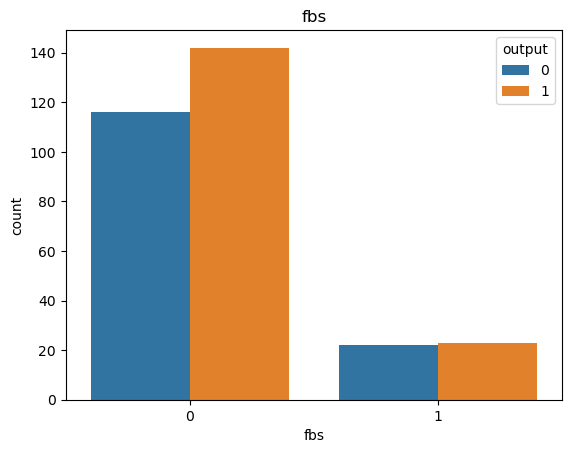

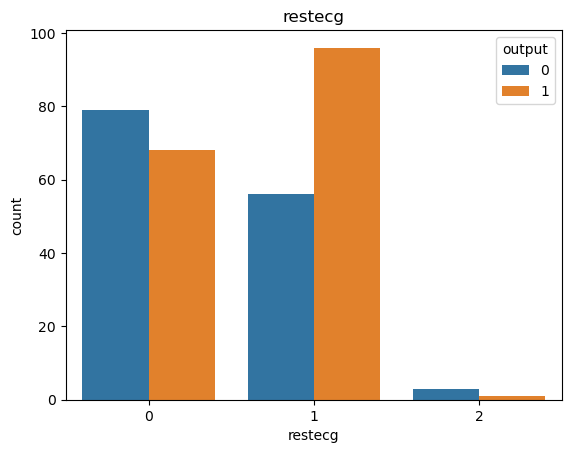

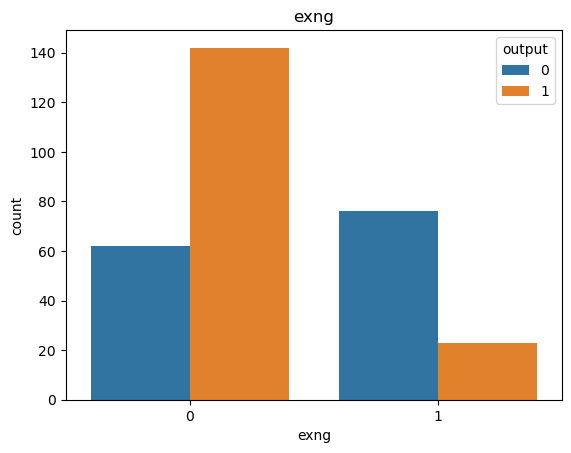

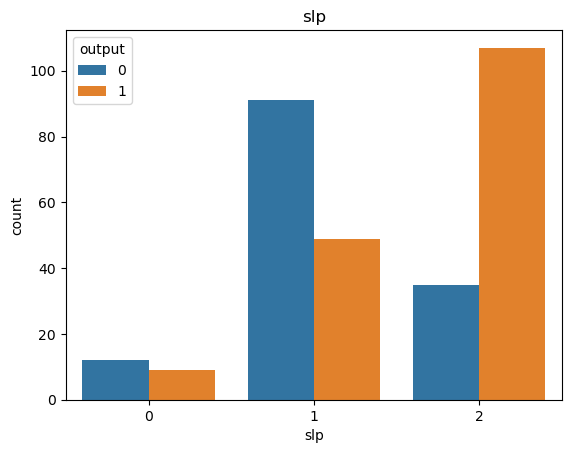

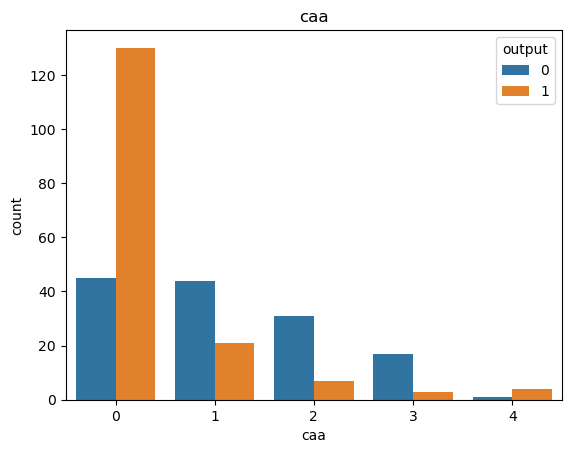

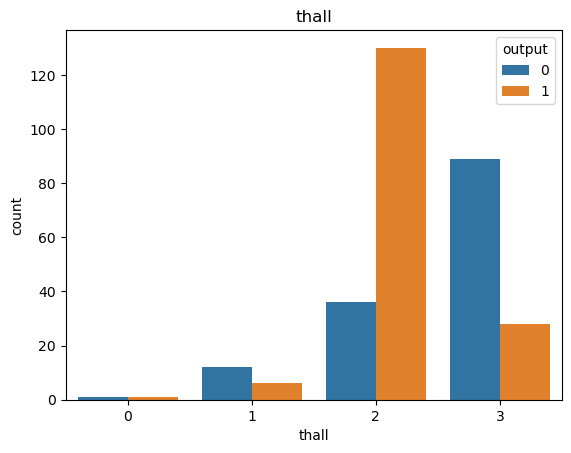

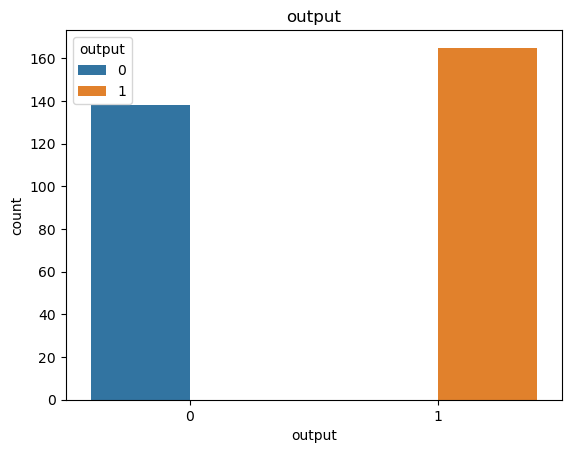

In [37]:
for i in data_kat:
    plt.figure()
    sns.countplot(x=i,data=data_kat,hue="output")
    plt.title(i)

In [41]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [42]:
sayisal = ["age","trtbps","chol","thalachh","oldpeak","output"]

In [43]:
data_sayisal = data.loc[:,sayisal]

In [45]:
data_sayisal.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


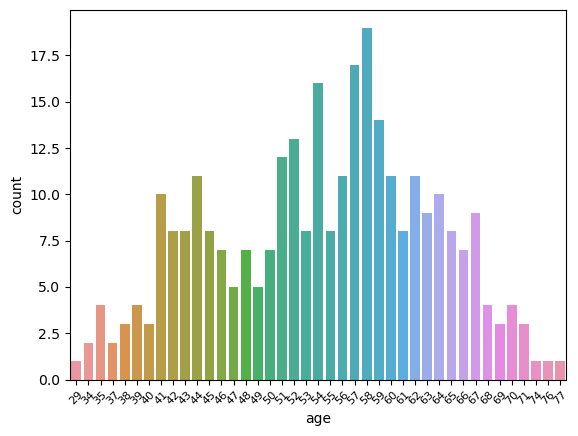

In [62]:
sns.countplot(x="age",data=data_sayisal)
plt.xticks(fontsize = 8,rotation=45)
plt.show()

D:\Data_Science\datascienceana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Data_Science\datascienceana\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Data_Science\datascienceana\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Data_Science\datascienceana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: 

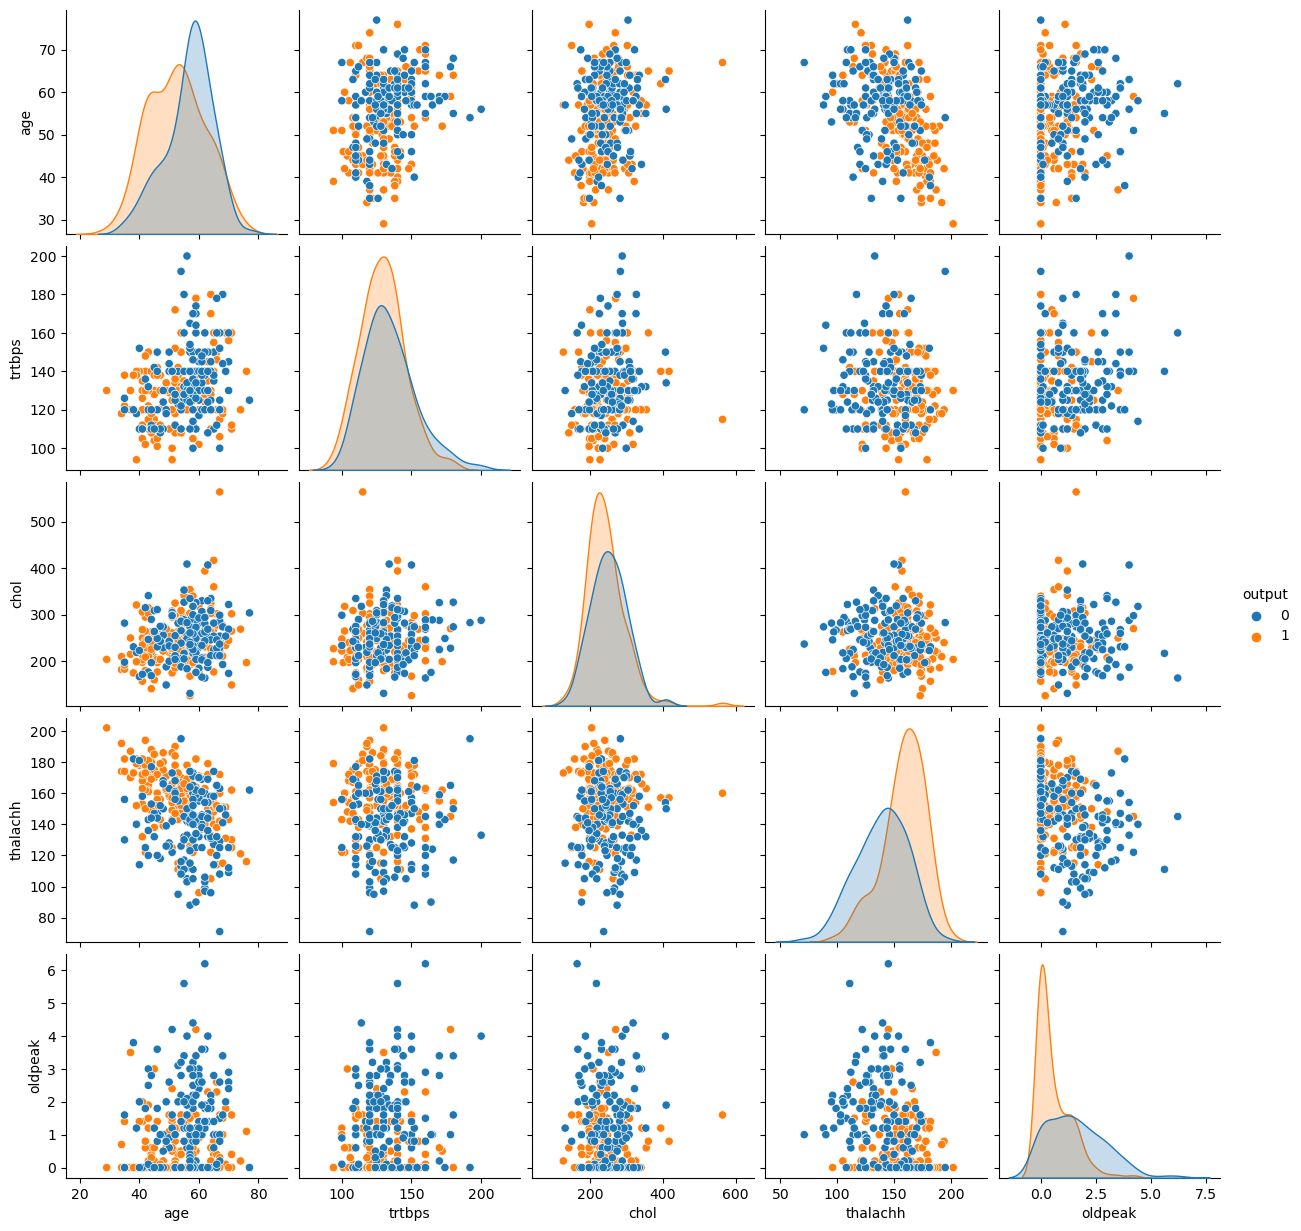

In [63]:
sns.pairplot(data_sayisal, hue = "output", diag_kind="kde")
plt.show()

In [65]:
scaler = StandardScaler()

In [66]:
scaled_array = scaler.fit_transform(data[sayisal[:-1]])

In [67]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [68]:
data1 = data.copy()

In [70]:
data1.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [71]:
data1 = pd.get_dummies(data1,columns=kategorik[:-1],drop_first=True)
data1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [73]:
x = data1.drop(["output"],axis = 1)
y = data1[["output"]]
x.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [74]:
y.head()

,output
0,1
1,1
2,1
3,1
4,1


In [75]:
scaler = StandardScaler()

In [76]:
x[sayisal[:-1]] = scaler.fit_transform(x[sayisal[:-1]])

In [78]:
x.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.15,random_state = 5)

In [80]:
logreg = LogisticRegression()

In [81]:
logreg.fit(xtrain,ytrain)

D:\Data_Science\datascienceana\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [84]:
ypred_prob = logreg.predict_proba(xtest)
ypred_prob  # sag taraf kanser olma oranı

array([[0.15779321, 0.84220679],
       [0.99330273, 0.00669727],
       [0.98781089, 0.01218911],
       [0.80319354, 0.19680646],
       [0.43934406, 0.56065594],
       [0.9629175 , 0.0370825 ],
       [0.31035965, 0.68964035],
       [0.98885952, 0.01114048],
       [0.03512156, 0.96487844],
       [0.02981201, 0.97018799],
       [0.21669054, 0.78330946],
       [0.97620971, 0.02379029],
       [0.16388954, 0.83611046],
       [0.0485008 , 0.9514992 ],
       [0.71554869, 0.28445131],
       [0.71467069, 0.28532931],
       [0.66573742, 0.33426258],
       [0.29055171, 0.70944829],
       [0.06412686, 0.93587314],
       [0.95360077, 0.04639923],
       [0.97863652, 0.02136348],
       [0.92497894, 0.07502106],
       [0.0692261 , 0.9307739 ],
       [0.94318477, 0.05681523],
       [0.79264404, 0.20735596],
       [0.1033246 , 0.8966754 ],
       [0.25762611, 0.74237389],
       [0.03756692, 0.96243308],
       [0.09545829, 0.90454171],
       [0.96817415, 0.03182585],
       [0.

In [83]:
xtest.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
302,0.290464,-0.092738,-0.198357,1.064975,-0.896862,False,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
243,0.290464,1.163746,0.536011,-2.695849,0.138373,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True
268,-0.040403,-0.549641,0.767917,-1.471394,1.863764,True,False,False,False,False,...,True,True,False,False,True,False,False,False,True,False
213,0.731619,0.763956,1.173752,-0.159479,-0.034166,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
24,-1.584446,0.478391,-0.913400,1.239897,0.310912,True,False,False,True,False,...,True,False,True,False,False,False,False,False,False,True


In [85]:
ypred = np.argmax(ypred_prob,axis = 1)
ypred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [86]:
dummy = pd.DataFrame(ypred_prob)
dummy["ypred"] = ypred
dummy.head()

,0,1,ypred
0,0.157793,0.842207,1
1,0.993303,0.006697,0
2,0.987811,0.012189,0
3,0.803194,0.196806,0
4,0.439344,0.560656,1


In [87]:
print("test accuracy",accuracy_score(ypred,ytest))

test accuracy 0.8913043478260869
